In [17]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'mathtext.default':  'regular' })
from matplotlib.ticker import MultipleLocator
import json
import pandas as pd
from pathlib import Path

In [18]:
embodied_carbon = 26356.568
device_life_years = 5
embodied_carbon_per_sec=embodied_carbon / device_life_years / 365 / 24 / 3600
# carbon_per_req = self.energy_per_lvl[co2opt_lvl] * ci + self.embodied_carbon_per_sec * self.time_per_lvl[co2opt_lvl]

# Resolution

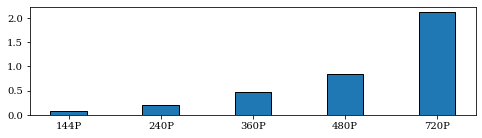

In [19]:
steps = 100
frames = 16
batch = 1

resolutions = {"144P": (144, 256), 
               "240P": (240, 426), 
               "360P": (360, 640),
               "480P": (480, 854),
               "720P": (720, 1280),}

y = []
for k, v in resolutions.items():
    with open(f"../data/char_sample_1/batch_{batch}_steps_{steps}_frames_{frames}_reso_{v[0]}x{v[1]}.json.json") as f:
        data = json.load(f)
    total_co2 = np.mean(data["co2"]) + embodied_carbon_per_sec * np.mean(data["time"])
    y.append(total_co2)


fig, axs = plt.subplots(nrows=1, ncols=1, gridspec_kw={'hspace': 0.4, 'wspace': 0.4, 'bottom': 0.2, 
                    'top': 0.8, 'right':0.995, 'left':0.17}, figsize=(7.5,2.5))
bars = axs.bar(list(resolutions.keys()), y, width=0.4, zorder=3, edgecolor='black')
